In [1]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [2]:
#b.add_dataset('KOI_lc')

b.add_dataset('lc', times = np.linspace(0,1,130), dataset = 'KOI_lc')
print(b.get_dataset(kind = 'lc', check_visible = False))

ParameterSet: 29 parameters
            times@KOI_lc@dataset: [0.         0.00775194 0.01550388 ... 0.98449612
 0.99224806 1.        ] d
           fluxes@KOI_lc@dataset: [] W / m2
         passband@KOI_lc@dataset: Johnson:V
  intens_weighting@KOI_lc@dat...: energy
*             ebv@KOI_lc@dataset: 0.0
               Av@KOI_lc@dataset: 0.0
               Rv@KOI_lc@dataset: 3.1
    compute_times@KOI_lc@dataset: [] d
*  compute_phases@KOI_lc@dataset: []
  compute_phases_t0@KOI_lc@da...: t0_supconj
           sigmas@KOI_lc@dataset: [] W / m2
       pblum_mode@KOI_lc@dataset: component-coupled
  pblum_component@KOI_lc@dataset: primary
    pblum_dataset@KOI_lc@dataset: 
           pbflux@KOI_lc@dataset: 1.0 W / m2
          l3_mode@KOI_lc@dataset: flux
               l3@KOI_lc@dataset: 0.0 W / m2
          l3_frac@KOI_lc@dataset: 0.0
          exptime@KOI_lc@dataset: 0.0 s
  ld_mode@primary@KOI_lc@dataset: interp
  ld_mode@secondary@KOI_lc@da...: interp
  ld_func@primary@KOI_lc@dataset: log

In [3]:
b.run_compute(irrad_method = 'wilson')

<ParameterSet: 4 parameters | contexts: figure, model>

In [17]:
# Primary
#b.set_value('mass@primary@star@component', 2.33)
b.set_value('teff@primary', 8498)
b.set_value('requiv@primary', 0.5)                 # (r_1 = 2.20)
b.set_value('gravb_bol@primary', 0.25)

# Secondary
#b.set_value('mass@secondary', 2.39)
b.set_value('teff@secondary', 8667)
b.set_value('requiv@secondary', 0.5)               # (r_2 = 2.33)

b.set_value('q@binary', 0.1)                       # (q = 1.034, RV Fit)

# b['teff@primary'] = 8498 
# b['requiv@primary'] = 2.33
# b['gravb_bol@primary'] = 0.25

# b['teff@secondary'] = 8667
# b['requiv@secondary'] = 2.20

# b['q@binary'] = 1.034

# b.flip_constraint('mass@primary', solve_for='sma@binary')
# b['mass@primary'] = 2.33
# print(b.filter(qualifier=['mass', 'requiv', 'teff'], context='component'))

Tue, 09 Mar 2021 10:45 BUNDLE       WARNING secondary is overflowing at periastron (requiv=2.33, requiv_max=1.0886239130649273).  Use contact model if overflowing is desired.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Tue, 09 Mar 2021 10:45 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8498K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.25.
Tue, 09 Mar 2021 10:45 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=8667K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Tue, 09 Mar 2021 10:45 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8498K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Tue, 09 Mar 2021 10:45 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=8667K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might 

In [7]:
# b['irrad_frac_refl_bol@primary'] = 1.0
# b['irrad_frac_refl_bol@secondary'] = 0.6

In [8]:
# b['eclipse_method'] = 'only_horizon'

In [9]:
# phases = phoebe.linspace(0,1,101)
# b.add_dataset('lc', times=b.to_time(phases))

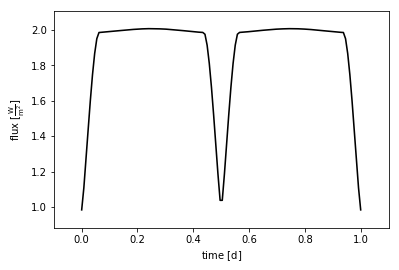

In [15]:
afig, mplfig = b['lc@model'].plot(show=True)

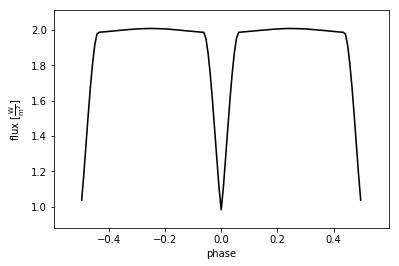

In [16]:
afig, mplfig = b['lc@model'].plot(x='phases', show=True)

In [29]:
# Different Method

# b = phoebe.default_binary()
# b.set_value('q', value=0.75)
# b.add_dataset('lc', times = phoebe.linespace(0,2,101))
# b.add_dataset('rv', times = phoebe.linespace(0,2,101))
# b.run_compute()
# b.polt(x = 'phases', show = True)